C:\Users\Lisa Salewsky\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


[
    {
    "tour": "Tour 1",
    "runs": [
    {
    "run": "Run 1",
    "values": "00000000-0000-0000-0000-000012af3860, 00000000-0000-0000-0000-0001896c6d54, 00000000-0000-0000-0000-000189712d0b, 00000000-0000-0000-0000-000025018326, 00000000-0000-0000-0000-000189712d0c, 00000000-0000-0000-0000-000025018326, 00000000-0000-0000-0000-000189712d0c, 00000000-0000-0000-0000-000025018326, 00000000-0000-0000-0000-000189712d0c, 00000000-0000-0000-0000-000025018326, 00000000-0000-0000-0000-000189712d0c, 00000000-0000-0000-0000-000025018326, 00000000-0000-0000-0000-000189712d0c, 00000000-0000-0000-0000-000025018326, 00000000-0000-0000-0000-000189712d0c, 00000000-0000-0000-0000-000025018326, 00000000-0000-0000-0000-000189712d0c, 00000000-0000-0000-0000-000025018326, 00000000-0000-0000-0000-000189712d0c, 00000000-0000-0000-0000-000025018326, 00000000-0000-0000-0000-000189712d0c, 00000000-0000-0000-0000-000025018326, 00000000-0000-0000-0000-000189712d0c, 00000000-0000-0000-0000-000025018326, 000

NameError: name 'coordinates' is not defined

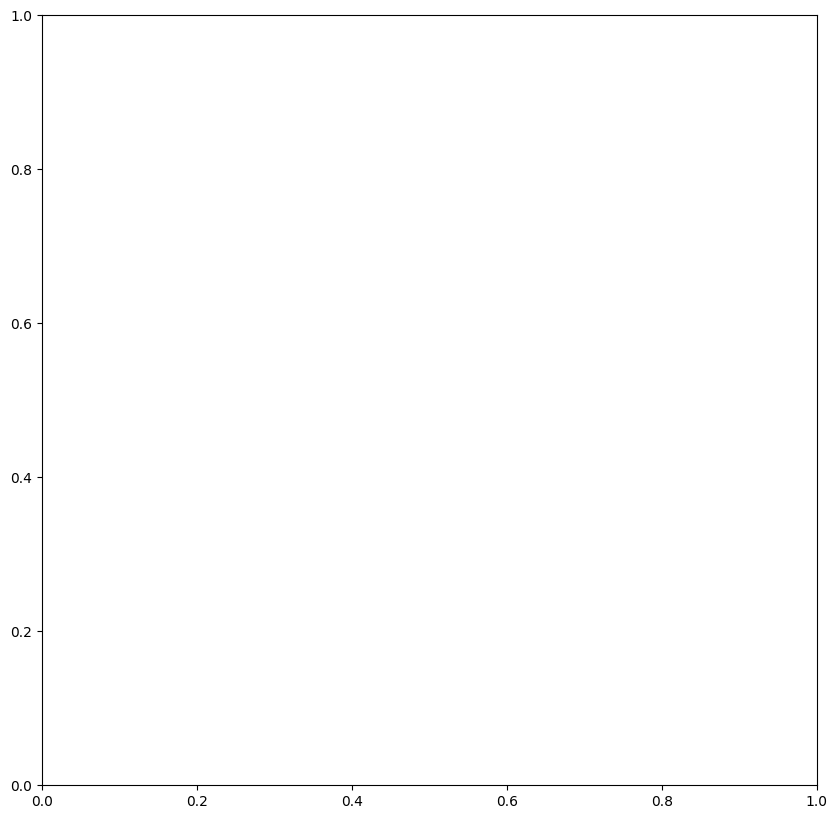

In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import json
import hashlib
import requests
import uuid


def extract_osmid(uuid_str):
    uuid_obj = uuid.UUID(uuid_str)
    osmid_bytes = uuid_obj.bytes
    sha256_digest = hashlib.sha256(osmid_bytes).digest()
    # The original OSM ID tuple length is stored in the first byte of the SHA256 digest
    osmid_tuple_length = sha256_digest[0]
    # Extract the OSM ID tuple bytes from the digest
    osmid_tuple_bytes = sha256_digest[1:1+osmid_tuple_length]
    # Convert the tuple bytes back to a tuple of integers
    osmid_tuple = tuple(int.from_bytes(osmid_tuple_bytes[i:i+8], byteorder='big') for i in range(0, len(osmid_tuple_bytes), 8))
    return osmid_tuple

# Fetch data from your backend
url = 'https://localhost:44323/Helper/PathParameterTestPage.asmx?op=GeneratePathTestPlot'
# url = 'https://localhost:44323/Helper/PathParameterTestPage.asmx'
params = {'numberPaths': 10}
# response = requests.post(url, data=params, verify=False)

soap_request = """
<soap:Envelope xmlns:soap="http://www.w3.org/2003/05/soap-envelope" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:xsd="http://www.w3.org/2001/XMLSchema">
  <soap:Body>
    <GeneratePathTestPlot xmlns="http://localhost:44323/">
      <numberPaths>10</numberPaths>
    </GeneratePathTestPlot>
  </soap:Body>
</soap:Envelope>
"""


# Headers for the SOAP request
headers = {
    'Content-Type': 'application/soap+xml',  # Specify the SOAP content type
    'charset': 'utf-8',                       # Specify the character encoding
    'SOAPAction': 'http://tempuri.org/GeneratePathTestPlot',  # SOAPAction header value
}
# headers = {'Token': 'AnyRandomToken', 'Content-Type':'application/soap+sml'}
response = requests.post(url, headers=headers, data=soap_request, verify=False)

# Make a POST request with the XML data
# response = requests.post(url, data=xml_data, headers=headers, verify=False)

# Initialize a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Initialize an empty list to store the paths
paths = []


root = ET.fromstring(response.text)
soap_body = root.find('.//{http://www.w3.org/2003/05/soap-envelope}Body')
json_data = soap_body.find('.//{http://localhost:44323/}GeneratePathTestPlotResult').text

# Print the JSON data
print(json_data)

# If you want to parse the JSON string into a Python object
parsed_json = json.loads(json_data)
print(parsed_json)

place_name = "Dortmund, North-Rhine Westphalia, Germany"
G = ox.graph_from_place(place_name, network_type='all')

# Iterate over each tour in the data
for tour in parsed_json:
    # Extract tour details
    tour_name = tour["tour"] 
    for run in tour["runs"]:
        tour_name = tour_name + " " + run["run"]
        coordinates_str  = run["values"]
        color = run["color"]
        opacity = run["opacity"]

        for uuid in coordinates_str:
            coordinates.append(extract_osmid(uuid))
        
        # Extract latitude and longitude coordinates from the data
        # coordinates = json.loads(coordinates_str) 
        # lats = coordinates[0]
        # lons = coordinates[1]
        # lat_lon_path = []
        # for lat, lon in coordinates:
        #     # print(str(lat) + ", " + str(lon))
        #     lat_lon_path.append((lat, lon))
        
        paths.append(coordinates)

        # print(path)

# Plot each path on the map
for path, tour in zip(paths, parsed_json):
    ox.plot_graph_route(G=G, route=path, route_color=color, route_linewidth=2, route_alpha=opacity, fig=fig, ax=ax, orig_dest_colors=color)

# Set title and display the plot
plt.title('Map Plot with Paths')
plt.show()

done
start


C:\Users\Lisa Salewsky\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


parsed
Tour 1
covered area Tour 1 Run 1, 1: 20
[29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221]
min: 29003.9021144221, max: 29003.9021144221
min: 448, max: 566
Tour 2
covered area Tour 2 Run 2, 1: 20
[29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221, 29003.9021144221]
min: 29003.9021144221, max: 29003.9021144221
min: 448, max: 566
Tour 3
covered area Tour 3 Run 3, 1: 20
[29003.9021144221, 2900

C:\Users\Lisa Salewsky\AppData\Local\Temp\ipykernel_24160\3845512222.py:187: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([ymin, ymax])


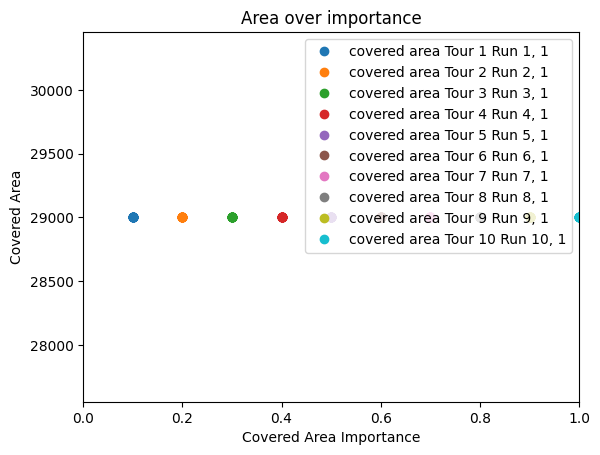

1
min: 29003.9021144221, max: 29003.9021144221
summed and normalized 1: 10
start


C:\Users\Lisa Salewsky\AppData\Local\Temp\ipykernel_24160\3845512222.py:217: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([ymin, ymax])
C:\Users\Lisa Salewsky\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'localhost'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

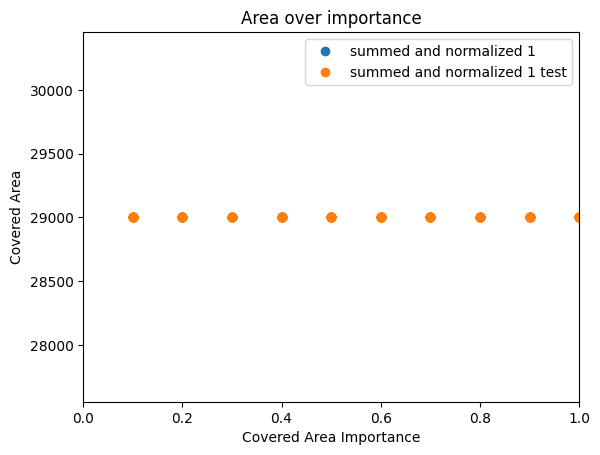

In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import json
import hashlib
import requests
from builtins import min, max


def callBackend(ant):    
    # Fetch data from your backend
    url = 'https://localhost:44323/Helper/GeneralTestPage.asmx?op=GenerateTestingValues'
    # url = 'https://localhost:44323/Helper/PathParameterTestPage.asmx'
    params = {'numberPaths': 10}
    # response = requests.post(url, data=params, verify=False)
    
    soap_request = """
    <soap:Envelope xmlns:soap="http://www.w3.org/2003/05/soap-envelope" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:xsd="http://www.w3.org/2001/XMLSchema">
      <soap:Body>
        <GenerateTestingValues xmlns="http://localhost:44323/">
          <algorithm>Ant</algorithm>
          <pathLength>6000</pathLength>
          <numberPaths>10</numberPaths>
          <numberAnts>""" + str(ant) + """</numberAnts>
          <numberRunsAnt>50</numberRunsAnt>
          <alpha>0.3</alpha>
          <beta>0.7</beta>
          <evaporationRate>0.6</evaporationRate>
          <edgeScalingOPenalty>100</edgeScalingOPenalty>
          <initTrailIntensity>10</initTrailIntensity>
          <TrailPenalty>1000</TrailPenalty>
          <newPheromoneFucntion>Profit</newPheromoneFucntion>
          <numberRunsSA>10</numberRunsSA>
          <numberRepitiionsSA>10</numberRepitiionsSA>
          <initTemperature>10</initTemperature>
          <coolingFunction>10</coolingFunction>
          <numberWaypoints>10</numberWaypoints>
          <distanceScalingCalculationForProbability>10</distanceScalingCalculationForProbability>
        </GenerateTestingValues>
      </soap:Body>
    </soap:Envelope>
    """
    
    print("start")
    # Headers for the SOAP request
    headers = {
        'Content-Type': 'application/soap+xml',  # Specify the SOAP content type
        'charset': 'utf-8',                       # Specify the character encoding
        'SOAPAction': 'http://tempuri.org/GeneratePathTestPlot',  # SOAPAction header value
    }
    # headers = {'Token': 'AnyRandomToken', 'Content-Type':'application/soap+sml'}
    response = requests.post(url, headers=headers, data=soap_request, verify=False)
    
    # Make a POST request with the XML data
    # response = requests.post(url, data=xml_data, headers=headers, verify=False)
    
    # Initialize a figure and axis for plotting
    # fig, ax = plt.subplots(figsize=(10, 10))
    
    # Initialize an empty list to store the paths
    # paths = []
    
    
    root = ET.fromstring(response.text)
    soap_body = root.find('.//{http://www.w3.org/2003/05/soap-envelope}Body')
    json_data = soap_body.find('.//{http://localhost:44323/}GenerateTestingValuesResult').text
    
    # Print the JSON data
    # print(json_data)
    
    # If you want to parse the JSON string into a Python object
    parsed_json = json.loads(json_data)
    # print(parsed_json)
    print("parsed")
    return parsed_json
# place_name = "Dortmund, North-Rhine Westphalia, Germany"
# G = ox.graph_from_place(place_name, network_type='all')


# Iterate over each tour in the data
# for tour in parsed_json:
#     # Extract tour details
#     tour_name = tour["tour"] 
#     for run in tour["runs"]:
#         tour_name = tour_name + " " + run["run"]
#         covered_area.append( run["CoveredArea"])
#         covered_area_importance.append(run["CoveredAreaImportance"])
#         profit.append(run["Profit"])
#         profit_importance.append(run["ProfitImportance"])
#         elevation.append(run["Elevation"])
#         elevation_importance.append(run["ElevationImportance"])
#         quality.append(run["Quality"])
#         time.append(run["Time"])
#         memUse.append(run["MemoryUse"])
print("done")



test_covered_area = []
test_covered_area_importance = []
test_profit = []
test_profit_importance = []
test_elevation = []
test_elevation_importance = []
test_quality = []
test_time = []
test_memUse = []

general_covered_area = []
general_covered_area_importance = []
general_profit = []
general_profit_importance = []
general_elevation = []
general_elevation_importance = []
general_quality = []
general_time = []
general_memUse = []


number_ants = [1, 10, 50, 100, 1000]
number_runs = [1, 5, 10, 20, 50, 100]
number_repititions = [1, 5, 10, 20, 50, 100]
algorithms = ["Greedy", "MinCost", "Ant", "AntGreedy", "AntMinCost", "SAEmpty", "SAGreedy", "SAMinCost", "SAAnt", "SAFullyRandom"]
# algorithm = [1,2,3,4,5,6,7,8,9,10]

for ant in number_ants:
    parsed_json = callBackend(ant)
    # Iterate over each tour in the data
    ymin = 999999999
    ymax = -1
    tmin = 999999999
    tmax = -1
    for tour in parsed_json:
        # Extract tour details
        tour_name = tour["tour"] 
        print(tour_name)
        
        covered_area = []
        covered_area_importance = []
        profit = []
        profit_importance = []
        elevation = []
        elevation_importance = []
        quality = []
        time = []
        memUse = []
        for run in tour["runs"]:
            tour_name = tour["tour"] + " " + run["run"]
            covered_area.append(run["CoveredArea"])
            covered_area_importance.append(run["CoveredAreaImportance"])
            profit.append(run["Profit"])
            profit_importance.append(run["ProfitImportance"])
            elevation.append(run["Elevation"])
            elevation_importance.append(run["ElevationImportance"])
            quality.append(run["Quality"])
            time.append(run["Time"])
            memUse.append(run["MemoryUse"])
            # print(run["CoveredAreaImportance"])
            # print(run["CoveredArea"])
            test_covered_area.append(run["CoveredArea"])
            test_covered_area_importance.append(run["CoveredAreaImportance"])
            test_profit.append(run["Profit"])
            test_profit_importance.append(run["ProfitImportance"])
            test_elevation.append(run["Elevation"])
            test_elevation_importance.append(run["ElevationImportance"])
            test_quality.append(run["Quality"])
            test_time.append(run["Time"])
            test_memUse.append(run["MemoryUse"])
            if(run["CoveredArea"] < ymin):
                ymin = run["CoveredArea"]
            if(run["CoveredArea"] > ymax):
                ymax = run["CoveredArea"]
            if(run["Time"] < tmin):
                tmin = run["Time"]
            if(run["Time"] > tmax):
                tmax = run["Time"]
            

        label = "covered area " + str(tour_name) + ", " + str(ant)
        print(label + ": " + str(len(covered_area)))
        print(covered_area)
        print("min: " + str(ymin) + ", max: " + str(ymax))
        print("min: " + str(tmin) + ", max: " + str(tmax))
        # plt.figure(figsize=(10, 6), dpi=100)
        ax = plt.gca()
        ax.set_xlim([0, 1])
        ax.set_ylim([ymin, ymax])
        plt.plot(covered_area_importance, covered_area, marker = 'o', linestyle = '', linewidth=1, label=label)
        plt.legend()
        plt.xlabel('Covered Area Importance')
        plt.ylabel('Covered Area')
        plt.title('Area over importance')
        
        general_covered_area.append(sum(covered_area)/len(covered_area))
        general_covered_area_importance.append(sum(covered_area_importance)/len(covered_area_importance))
        general_profit.append(sum(profit)/len(profit))
        general_profit_importance.append(sum(profit_importance)/len(profit_importance))
        general_elevation.append(sum(elevation)/len(elevation))
        general_elevation_importance.append(sum(elevation_importance)/len(elevation_importance))
        general_quality.append(sum(quality)/len(quality))
        general_time.append(sum(time)/len(time))
        general_memUse.append(sum(memUse)/len(memUse))
    
    plt.show()
    # print(general_covered_area)
    # print(general_covered_area_importance)
    # for ants in number_ants:
    print(ant)
    ymin = min(general_covered_area)
    ymax = max(general_covered_area)
    print("min: " + str(ymin) + ", max: " + str(ymax))
    label = "summed and normalized " + str(ant)
    print(label + ": " + str(len(general_covered_area)))
    # plt.figure(figsize=(10, 6), dpi=100)
    ax = plt.gca()
    ax.set_xlim([0, 1])
    ax.set_ylim([ymin, ymax])
    plt.plot(general_covered_area_importance, general_covered_area, marker = 'o', linestyle = '', linewidth=1, label=label)
    plt.plot(test_covered_area_importance, test_covered_area, marker = 'o', linestyle = '', linewidth=1, label=label + " test")
    plt.legend()
    plt.xlabel('Covered Area Importance')
    plt.ylabel('Covered Area')
    plt.title('Area over importance')

plt.figure(figsize=(10, 6), dpi=100)
ax = plt.gca()
ax.set_xlim([0, 1])
ax.set_ylim([ymin, ymax])
print("min: " + str(ymin) + ", max: " + str(ymax))
plt.legend()
plt.xlabel('Covered Area Importance')
plt.ylabel('Covered Area')
plt.title('Area over importance')
plt.show()




In [46]:


covered_area = []
covered_area_importance = []
profit = []
profit_importance = []
elevation = []
elevation_importance = []
quality = []
time = []
memUse = []


general_covered_area = []
general_covered_area_importance = []
general_profit = []
general_profit_importance = []
general_elevation = []
general_elevation_importance = []
general_quality = []
general_time = []
general_memUse = []

# Iterate over each tour in the data
for tour in parsed_json:
    # Extract tour details
    tour_name = tour["tour"] 
    print(tour_name)
    for run in tour["runs"]:
        tour_name = tour_name + " " + run["run"]
        covered_area.append(run["CoveredArea"])
        covered_area_importance.append(run["CoveredAreaImportance"])
        profit.append(run["Profit"])
        profit_importance.append(run["ProfitImportance"])
        elevation.append(run["Elevation"])
        elevation_importance.append(run["ElevationImportance"])
        quality.append(run["Quality"])
        time.append(run["Time"])
        memUse.append(run["MemoryUse"])
        print(run["CoveredAreaImportance"])
        print(run["CoveredArea"])


plt.plot(covered_area_importance, covered_area, marker = 'o', linestyle = '-', linewidth=1, label="all covered area")
# Iterate over each tour in the data
for tour in parsed_json:
    # Extract tour details
    tour_name = tour["tour"] 
    print(tour_name)
    
    covered_area = []
    covered_area_importance = []
    profit = []
    profit_importance = []
    elevation = []
    elevation_importance = []
    quality = []
    time = []
    memUse = []
    for run in tour["runs"]:
        tour_name = tour_name + " " + run["run"]
        covered_area.append(run["CoveredArea"])
        covered_area_importance.append(run["CoveredAreaImportance"])
        profit.append(run["Profit"])
        profit_importance.append(run["ProfitImportance"])
        elevation.append(run["Elevation"])
        elevation_importance.append(run["ElevationImportance"])
        quality.append(run["Quality"])
        time.append(run["Time"])
        memUse.append(run["MemoryUse"])
        print(run["CoveredAreaImportance"])
        print(run["CoveredArea"])
    
    general_covered_area.append(sum(covered_area)/len(covered_area))
    general_covered_area_importance.append(sum(covered_area_importance)/len(covered_area_importance))
    general_profit.append(sum(profit)/len(profit))
    general_profit_importance.append(sum(profit_importance)/len(profit_importance))
    general_elevation.append(sum(elevation)/len(elevation))
    general_elevation_importance.append(sum(elevation_importance)/len(elevation_importance))
    general_quality.append(sum(quality)/len(quality))
    general_time.append(sum(time)/len(time))
    general_memUse.append(sum(memUse)/len(memUse))


print(general_covered_area)
print(general_covered_area_importance)
# for ants in number_ants:
plt.plot(general_covered_area_importance, general_covered_area, marker = 'o', linestyle = '-', linewidth=1, label="summed and normalized")
# plt.plot(covered_area, covered_area_importance, marker = 'o', linestyle = '-', linewidth=1, label=ants)
# plt.plot(covered_area, covered_area_importance, marker = 'o', linestyle = '-', linewidth=1, label=ants)
# plt.plot(covered_area, covered_area_importance, marker = 'o', linestyle = '-', linewidth=1, label=ants)
# plt.plot(covered_area, covered_area_importance, marker = 'o', linestyle = '-', linewidth=1, label=ants)
plt.legend()
plt.xlabel('Covered Area Importance')
plt.ylabel('Covered Area')
plt.title('Area over importance')
plt.show()


#         plt.plot(profit, profit_importance, marker = '', linestyle = '-', linewidth=1, label=ants)
#         plt.plot(elevation, elevation_importance, marker = '', linestyle = '-', linewidth=1, label=ants)
#         plt.plot(covered_area, time, marker = '', linestyle = '-', linewidth=1, label=ants)
#         plt.plot(profit, time, marker = '', linestyle = '-', linewidth=1, label=ants)
#         plt.plot(elevation, time, marker = '', linestyle = '-', linewidth=1, label=ants)
#         plt.plot(quality, time, marker = '', linestyle = '-', linewidth=1, label=ants)
#         plt.plot(covered_area, memUse, marker = '', linestyle = '-', linewidth=1, label=ants)
#         plt.plot(profit, memUse, marker = '', linestyle = '-', linewidth=1, label=ants)
#         plt.plot(elevation, memUse, marker = '', linestyle = '-', linewidth=1, label=ants)
#         plt.plot(quality, memUse, marker = '', linestyle = '-', linewidth=1, label=ants)




NameError: name 'callBackend' is not defined